# **TUGAS 1**

**Nama      : Deva Putra Setya Pratama**

**NIM       : 202010370311212**

**Kelas     : Analisis Big Data C**

Deskripsi : Melakukan Exploratory Data Analyst (EDA) dan melakukan preprocessing sederhana data guna mengetahui setiap fitur data dan hubungan fitur data. Dataset menggunakan data dari Open University Learning Analytics Dataset (OULAD) yang diperuntukkan untuk umum dengan tujuan untuk analisis Big Data.



**Import Library**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## **DATASET EXPLANATION & DATASET LOAD**

Membaca OULAD dataset yang terdiri dari 7 buah data yang memiliki fitur dan jumlah data yang berbeda-beda. Penjelasan setiap dataset dan fiturnya adalah sebagai berikut :

![Alt text](image.png)

**assessments.csv**

File ini berisi informasi tentang penilaian dalam presentasi modul. Biasanya setiap presentasi memiliki sejumlah penilaian yang dilanjutkan dengan ujian akhir. CSV berisi kolom:

**->** code_module – kode identifikasi modul tempat penilaian berada.

**->** code_presentation - kode identifikasi presentasi yang menjadi tempat penilaian.

**->** d_assessment – nomor identifikasi penilaian.

**->** assessment_type – jenis penilaian. Ada tiga jenis penilaian: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) dan Ujian Akhir (Ujian).

**->** date – informasi tentang tanggal penyerahan akhir penilaian yang dihitung sebagai jumlah hari sejak dimulainya presentasi modul. Tanggal mulai presentasi diberi angka 0 (nol).

**->** weight - bobot penilaian dalam%. Biasanya, Ujian diperlakukan secara terpisah dan memiliki bobot 100%; jumlah seluruh penilaian lainnya adalah 100%.

Jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.



**courses.csv**

File berisi daftar semua modul yang tersedia dan presentasinya. Kolomnya adalah:

**->**  code_module – nama kode modul, yang berfungsi sebagai pengenal.

**->**  code_presentation - nama kode presentasi.

**->**  module_presentation_length - panjang presentasi modul dalam hari.

Struktur presentasi B dan J mungkin berbeda dan oleh karena itu merupakan praktik yang baik untuk menganalisis presentasi B dan J secara terpisah. Namun demikian, untuk beberapa presentasi, presentasi B/J sebelumnya yang terkait tidak ada dan oleh karena itu presentasi J harus digunakan untuk menginformasikan presentasi B atau sebaliknya. Dalam kumpulan data, hal ini terjadi pada modul CCC, EEE, dan GGG.

**vle.csv**

File CSV berisi informasi tentang materi yang tersedia di VLE. Biasanya ini adalah halaman html, file pdf, dll. Siswa memiliki akses ke materi ini secara online dan interaksi mereka dengan materi dicatat. File vle.csv berisi kolom berikut:

**->** id_site – nomor identifikasi materi.

**->** code_module – kode identifikasi untuk modul.

**->** code_presentation - kode identifikasi presentasi.

**->** activity_type – peran yang terkait dengan materi modul.

**->** week_from – minggu dimana bahan tersebut direncanakan akan digunakan.

**->** week_to – minggu sampai bahan tersebut direncanakan akan digunakan.

**studentInfo.csv**

File ini berisi informasi demografis tentang siswa beserta hasilnya. File berisi kolom berikut:

**->** code_module – kode identifikasi untuk modul tempat siswa terdaftar.

**->** code_presentation - kode identifikasi presentasi saat siswa terdaftar pada modul.

**->** id_student – nomor identifikasi unik untuk siswa.

**->** gender – jenis kelamin siswa.

**->** region – mengidentifikasi wilayah geografis, tempat tinggal siswa saat mengambil presentasi modul.

**->** highest_education – tingkat pendidikan siswa tertinggi saat masuk ke presentasi modul.

**->** imd_band – menentukan pita Indeks Kerusakan Berganda dari tempat siswa tinggal selama presentasi modul.

**->** age_band – kelompok usia siswa.

**->** num_of_prev_attempts – berapa kali siswa mencoba modul ini.

**->** studied_credits – jumlah total SKS untuk modul yang sedang dipelajari siswa.

**->** disability – menunjukkan apakah siswa telah dinyatakan cacat.

**->** final_result – hasil akhir siswa dalam presentasi modul.

**studentRegistration.csv**

File ini berisi informasi waktu mahasiswa mendaftar presentasi modul. Bagi mahasiswa yang unregistrasi juga dicatat tanggal unregistrasinya. File berisi lima kolom:

**->** code_module – kode identifikasi untuk sebuah modul.

**->** code_presentation - kode identifikasi presentasi.

**->** id_student – nomor identifikasi unik untuk siswa.

**->** date_registration – tanggal pendaftaran siswa pada presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap dimulainya presentasi modul (misalnya nilai negatif -30 berarti siswa mendaftar untuk presentasi modul 30 hari sebelum presentasi modul dimulai).

**->** date_unregistration –tanggal pembatalan registrasi siswa dari presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap awal presentasi modul. Siswa yang menyelesaikan kursus mengosongkan bidang ini. Siswa yang unreg memiliki Withdrawal sebagai nilai kolom final_result pada file studentInfo.csv

**studentAssessment.csv**

File ini berisi hasil penilaian siswa. Jika siswa tidak menyerahkan penilaian, tidak ada hasil yang dicatat. Penyerahan ujian akhir hilang, jika hasil penilaian tidak tersimpan di sistem. File ini berisi kolom berikut:

**->** id_assessment – nomor identifikasi penilaian.

**->** id_student – nomor identifikasi unik

**Membaca dataset menggunakan library pandas**

In [2]:
assessments = pd.read_csv("dataset/assessments.csv")
courses = pd.read_csv("dataset/courses.csv")
student_assessment = pd.read_csv("dataset/studentAssessment.csv")
student_info = pd.read_csv("dataset/studentInfo.csv")
student_registration = pd.read_csv("dataset/studentRegistration.csv")
student_vle = pd.read_csv("dataset/studentVle.csv")
vle = pd.read_csv("dataset/vle.csv")

# **EXPLORATORY DATA ANALYS (EDA) + PREPROCESSING DATA PER DATASET**

# ASSESSMENTS

**Menampilkan data head dan data tail pada dataset assessments**

In [3]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


**Menampilkan jumlah data dan jumlah fitur assessments**

In [4]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
assessments.shape

JUMLAH DATA DAN JUMLAH FITUR :


(206, 6)


-> Jumlah data sebesar 206 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset assessments**

In [5]:
print("INFO DATA :")
assessments.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [6]:
# Melakukan cek jumlah data yang duplikat
duplicate = assessments.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada date sebanyak 11 baris (Karena sesuai penjelasan dataset jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.)

-> Tidak terdapat duplikasi data

**Menampilkan statistik data assessments**

In [7]:
print("STATISTIK DATA :")
assessments.describe()

STATISTIK DATA :


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Modul')

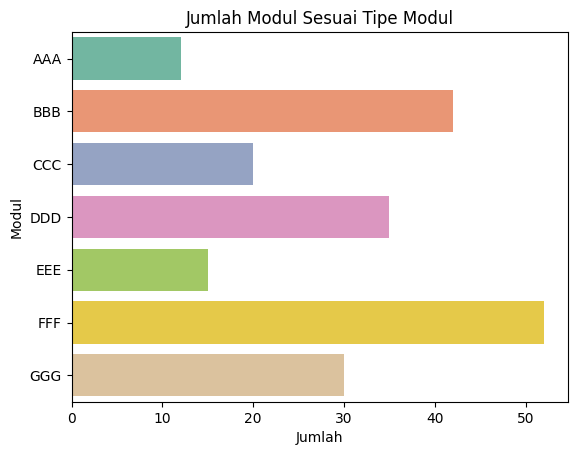

In [8]:
sns.countplot(data=assessments, y='code_module', palette='Set2')

plt.title('Jumlah Modul Sesuai Tipe Modul')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

-> Modul terbanyak adalah modul FFF

-> Modul paling sedikit adalah modul AAA

Text(0, 0.5, 'Modul')

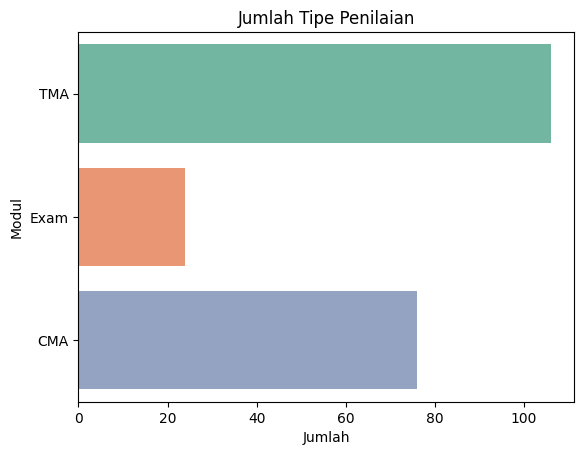

In [9]:
sns.countplot(data=assessments, y='assessment_type', palette='Set2')

plt.title('Jumlah Tipe Penilaian')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

-> Tipe penilaian yang paling banyak adalah TMA

-> Tipe penilaian yang paling sedikit adalah Exam

**Data Correlation**

In [10]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_assessments = assessments

for column in temp_assessments.columns:
    if temp_assessments[column].dtype == 'object':
        temp_assessments[column] = le.fit_transform(temp_assessments[column])
temp_assessments.dtypes

code_module            int32
code_presentation      int32
id_assessment          int64
assessment_type        int32
date                 float64
weight               float64
dtype: object

<Axes: >

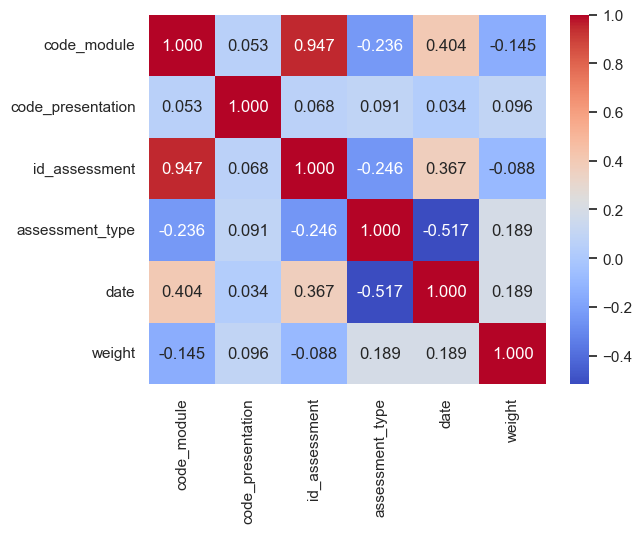

In [11]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_assessments.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**PREPROCESSING**

Poin penting preprocessing data :

-> Terdapat missing value pada date sebanyak 11 baris (Karena sesuai penjelasan dataset jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.)

In [12]:
# Menampilkan tiga buah data yang berkaitan yaitu code_presentasion dan date
assess_filtered = assessments.loc[:, ['code_presentation', 'assessment_type', 'date']]
assess_filtered.head(12)

,code_presentation,assessment_type,date
0,1,2,19.0
1,1,2,54.0
2,1,2,117.0
3,1,2,166.0
4,1,2,215.0
5,1,1,NaN
6,3,2,19.0
7,3,2,54.0
8,3,2,117.0
9,3,2,166.0


Dari data diatas dapat diketahui bahwa setiap code_representasion yang digunakan memiliki pola date yang sama yaitu 19, 54, 117, 166, dan 215. Dalam perbedaan di atas, terlihat bahwa perbedaan antara angka-angka ini membentuk pola pertambahan konstan, yaitu 35 dan 49. Namun, perbedaan kedua angka terakhir adalah 49, yang sama dengan perbedaan antara dua angka sebelumnya. Ini mungkin menunjukkan pola yang lebih kompleks atau tidak teratur.

Selain itu pada data NaN atau null tersebut selalu memiliki tipe Exam atau ujian akhir. Pada penjelasan dataset assessetmen juga dijelaskan bahwa jika informasi tanggal ujian akhir tidak ada, berarti pada akhir minggu presentasi terakhir.

Oleh karena itu disini akan saya ganti dengan nilai 264, nilai tersebut diperoleh dari dari penjumlahan nilai 215 pada pekan sebelumnya, sehingga 215 ditambah dengan 49 (pola pertambahan 2 angka terakhir) menjadi 264

In [13]:
# Mengubah nilai null menjadi 264
assessments.fillna(264, inplace=True)

In [14]:
# Jumlah null value pada setiap fitur
print(assessments.isnull().sum())

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64


In [15]:
assessments.head(12)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,0,1,1752,2,19.0,10.0
1,0,1,1753,2,54.0,20.0
2,0,1,1754,2,117.0,20.0
3,0,1,1755,2,166.0,20.0
4,0,1,1756,2,215.0,30.0
5,0,1,1757,1,264.0,100.0
6,0,3,1758,2,19.0,10.0
7,0,3,1759,2,54.0,20.0
8,0,3,1760,2,117.0,20.0
9,0,3,1761,2,166.0,20.0


Hasil -> Data assessments tidak lagi memiliki null value

# COURSES

**Menampilkan data head dan data tail pada dataset courses**

In [16]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


**Menampilkan jumlah data dan jumlah fitur courses**

In [17]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
courses.shape

JUMLAH DATA DAN JUMLAH FITUR :


(22, 3)


-> Jumlah data sebanyak 22 baris

-> Jumlah fitur adalah 3 buah

**Menampilkan dataset info dari dataset courses**

In [18]:
print("INFO DATA :")
courses.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [19]:
# Melakukan cek jumlah data yang duplikat
duplicate = courses.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 2 tipe data object dan 1 tipe data numerik

-> Tidak terdapat missing value

-> Tidak terdapat duplikasi data

**Menampilkan statistik data courses**

In [20]:
print("STATISTIK DATA :")
courses.describe()

STATISTIK DATA :


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Modul')

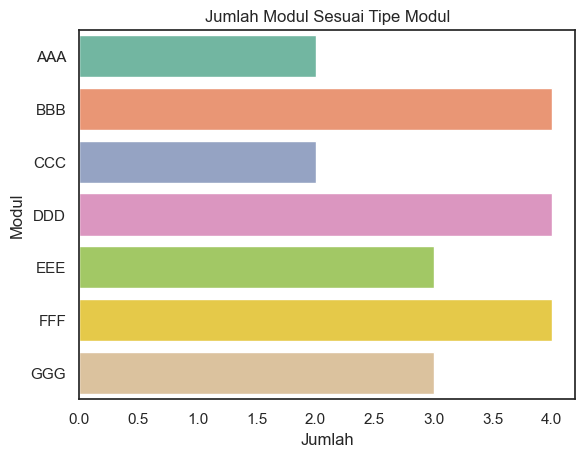

In [21]:
sns.countplot(data=courses, y='code_module', palette='Set2')

plt.title('Jumlah Modul Sesuai Tipe Modul')
plt.xlabel('Jumlah')
plt.ylabel('Modul')

Text(0, 0.5, 'Kurikulum')

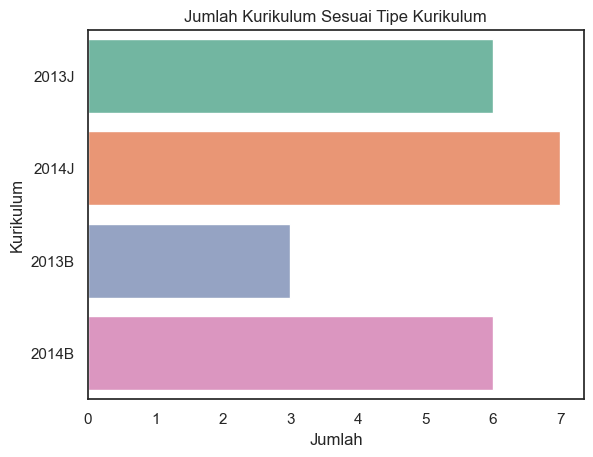

In [22]:
sns.countplot(data=courses, y='code_presentation', palette='Set2')

plt.title('Jumlah Kurikulum Sesuai Tipe Kurikulum')
plt.xlabel('Jumlah')
plt.ylabel('Kurikulum')

Text(0, 0.5, 'Kurikulum')

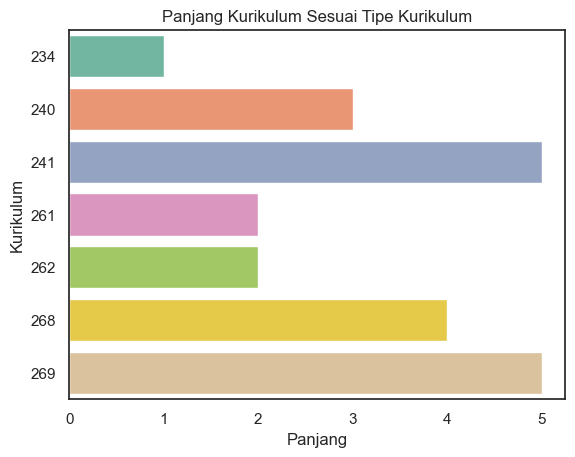

In [23]:
sns.countplot(data=courses, y='module_presentation_length', palette='Set2')

plt.title('Panjang Kurikulum Sesuai Tipe Kurikulum')
plt.xlabel('Panjang')
plt.ylabel('Kurikulum')

**Data Correlation**

In [24]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_courses = courses

for column in temp_courses.columns:
    if temp_courses[column].dtype == 'object':
        temp_courses[column] = le.fit_transform(temp_courses[column])
temp_courses.dtypes

code_module                   int32
code_presentation             int32
module_presentation_length    int64
dtype: object

<Axes: >

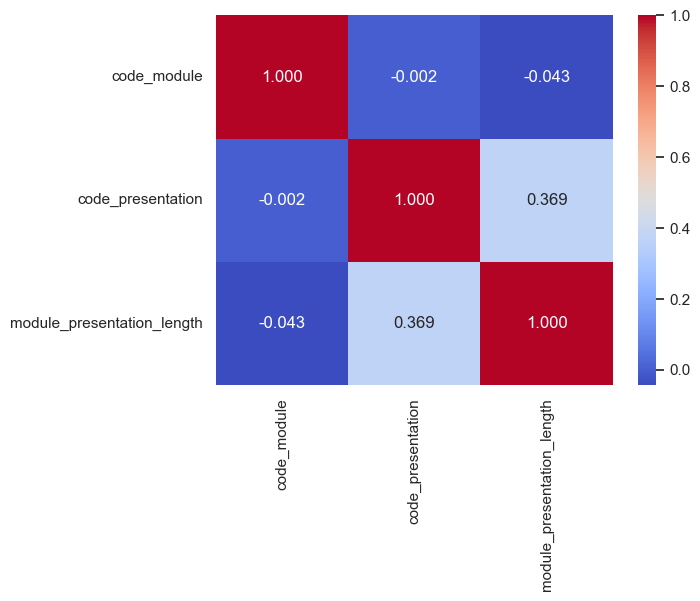

In [25]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_courses.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**Dari hasil analisis saya, data course data yang sudah bagus dan tidak perlu dilakukan data cleaning**

# STUDENT ASSESSMENT

**Menampilkan data head dan data tail pada dataset student assessments**

In [26]:
student_assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


**Menampilkan jumlah data dan jumlah fitur student assessment**

In [27]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_assessment.shape

JUMLAH DATA DAN JUMLAH FITUR :


(173912, 5)


-> Jumlah data sebesar 173912 baris

-> Jumlah fitur adalah 5 buah

**Menampilkan dataset info dari dataset student assessments**

In [28]:
print("INFO DATA :")
student_assessment.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [29]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_assessment.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 5 tipe data numerik

-> Terdapat **missing** value pada fitur score sebanyak 173 baris

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student assessment**

In [30]:
print("STATISTIK DATA :")
student_assessment.describe()

STATISTIK DATA :


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


-> Informasi statistik data pada fitur yang bertipe numerik

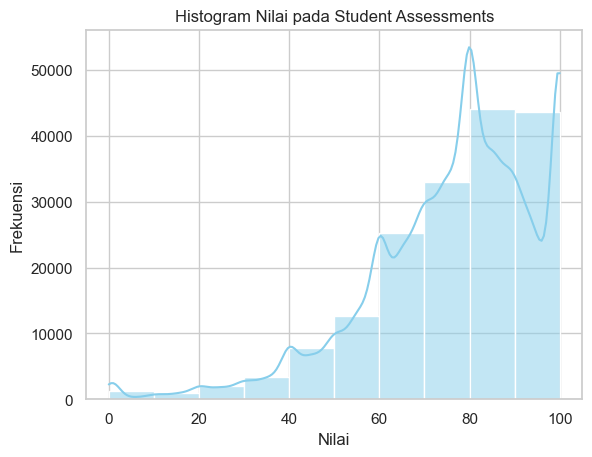

In [31]:
sns.set(style='whitegrid')

sns.histplot(data=student_assessment, x='score', bins=10, kde=True, color='skyblue')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai pada Student Assessments')
plt.show()

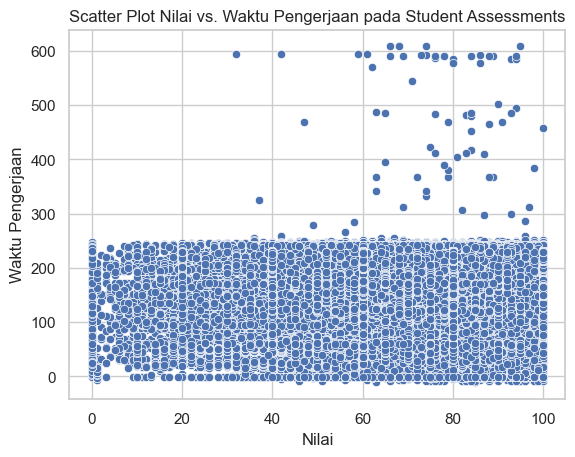

In [32]:
# Membuat scatter plot nilai vs. waktu pengerjaan
sns.scatterplot(x='score', y='date_submitted', data=student_assessment)
plt.xlabel('Nilai')
plt.ylabel('Waktu Pengerjaan')
plt.title('Scatter Plot Nilai vs. Waktu Pengerjaan pada Student Assessments')
plt.show()

**Data Correlation**

In [33]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_stustudent_assessment =student_assessment

for column in temp_stustudent_assessment.columns:
    if temp_stustudent_assessment[column].dtype == 'object':
        temp_stustudent_assessment[column] = le.fit_transform(temp_stustudent_assessment[column])
temp_stustudent_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

<Axes: >

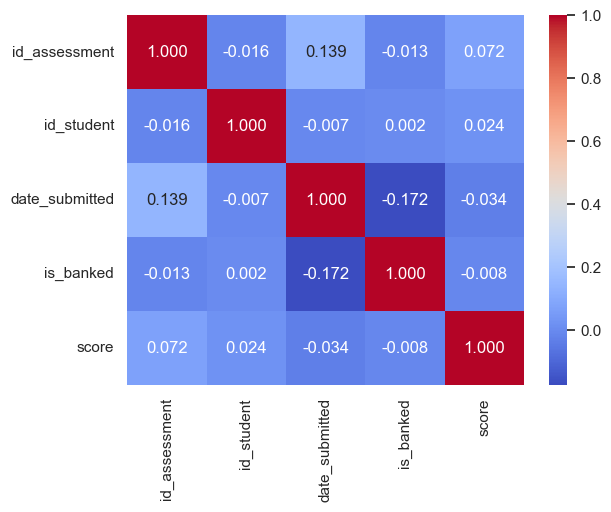

In [34]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_stustudent_assessment.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**PREPROCESSING**

Poin penting preprocessing data :

-> Terdapat **missing** value pada fitur score sebanyak 173 baris

Hal yang akan dilakukan adalah mengisi null value pada fitur score dengan rata-rata score seluruh mahasiswa

In [35]:
# Menampilkan rata-rata Score
np.mean(student_assessment['score'])

75.7995729226023

In [36]:
# Mengganti nilai kosong dengan 75
student_assessment['score'].fillna(75, inplace=True)

In [37]:
print(student_assessment.isnull().sum())
print(student_assessment.shape)

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64
(173912, 5)


**Data hilang atau missing value berhasil untuk diatasi dengan menambahkan nilai kosong dengan rata-rata score**

# STUDENT INFO

**Menampilkan data head dan data tail pada dataset student info**

In [38]:
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


**Menampilkan jumlah data dan jumlah fitur student info**

In [39]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_info.shape

JUMLAH DATA DAN JUMLAH FITUR :


(32593, 12)


-> Jumlah data sebesar 32593 baris

-> Jumlah fitur adalah 12 buah

**Menampilkan dataset info dari dataset student info**

In [40]:
print("INFO DATA :")
student_info.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [41]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_info.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 9 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur imd_band sebesar 1111 baris 

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student info**

In [42]:
print("STATISTIK DATA :")
student_info.describe()

STATISTIK DATA :


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


-> Informasi statistik data pada fitur yang bertipe numerik

Text(0, 0.5, 'Jumlah')

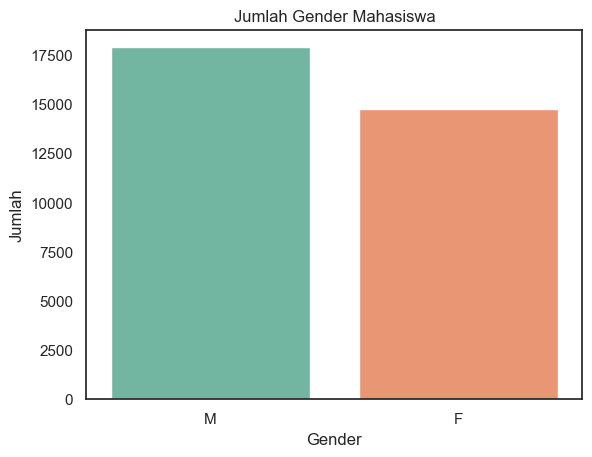

In [43]:
sns.countplot(data=student_info, x='gender', palette='Set2')

plt.title('Jumlah Gender Mahasiswa')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

-> Gender laki-laki lebih banyak daripada perempuan

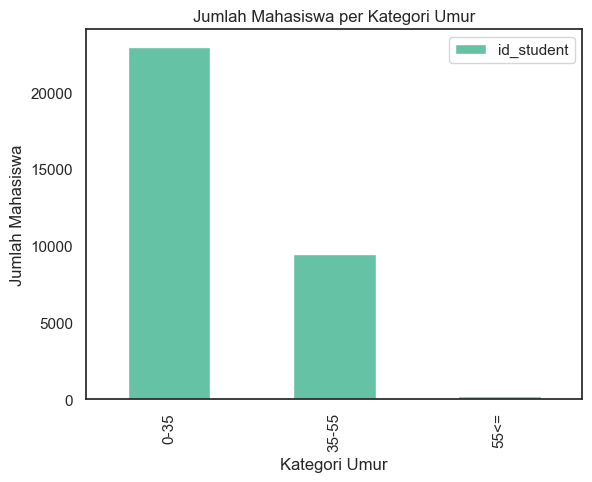

In [44]:
sns.set_palette('Set2')

student_info[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Umur')

plt.show()

-> Mayoritas didominasi oleh rentang umur dibawah 35 tahun
-> Umur 55 ke atas menjadi rentang umur terkecil

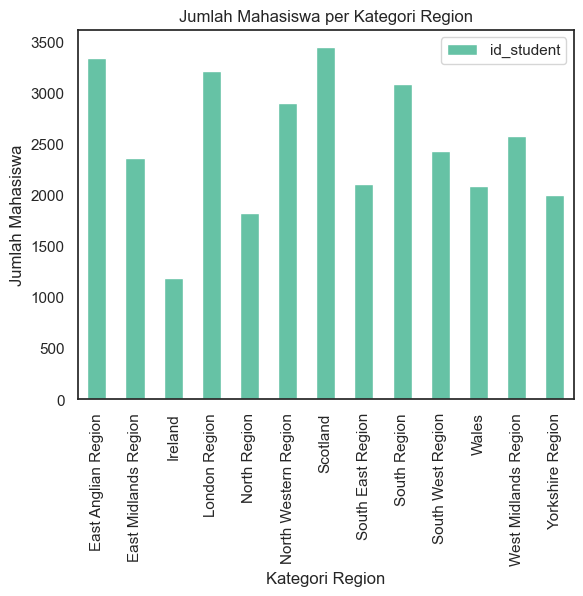

In [45]:
sns.set_palette('Set2')

student_info[['id_student', 'region']].groupby(by='region').count().plot.bar()

plt.xlabel('Kategori Region')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Region')

plt.show()

-> Scotland penyumbang mahasiswa terbanyak

-> Ireland penyumbang mahasiswa paling sedikit

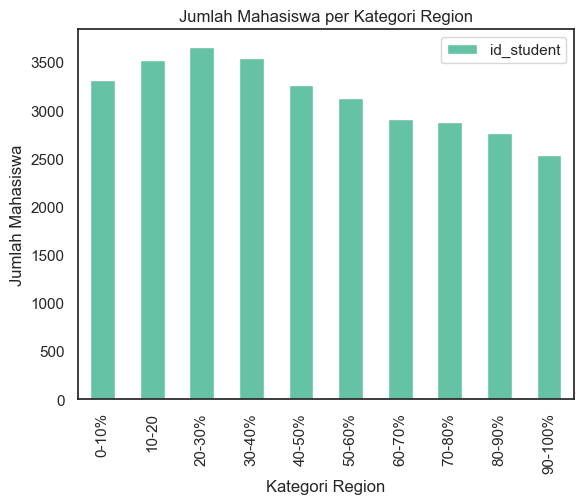

In [46]:
sns.set_palette('Set2')

student_info[['id_student', 'imd_band']].groupby(by='imd_band').count().plot.bar()

plt.xlabel('Kategori Region')
plt.ylabel('Jumlah Mahasiswa')

plt.title('Jumlah Mahasiswa per Kategori Region')

plt.show()

**Data Correlation**

In [47]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_stustudent_info =student_info

for column in temp_stustudent_info.columns:
    if temp_stustudent_info[column].dtype == 'object':
        temp_stustudent_info[column] = le.fit_transform(temp_stustudent_info[column])
temp_stustudent_info.dtypes

code_module             int32
code_presentation       int32
id_student              int64
gender                  int32
region                  int32
highest_education       int32
imd_band                int32
age_band                int32
num_of_prev_attempts    int64
studied_credits         int64
disability              int32
final_result            int32
dtype: object

<Axes: >

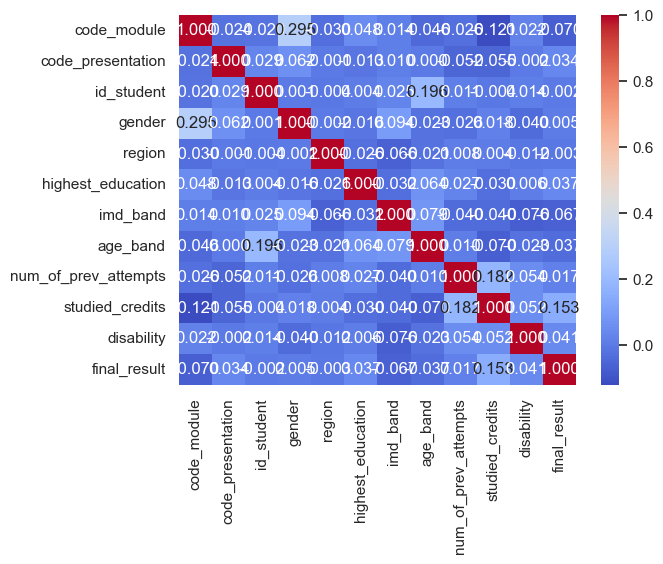

In [48]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = temp_stustudent_info.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**PREPROCESSING**

Poin penting preprocessing data :

-> Terdapat missing value pada fitur imd_band sebesar 1111 baris 

Terdapat 2 pilihan dalam mengatasi null value pada imd_band, yaitu dengan menghapus seluruh baris NaN atau mengganti nilainya dengan imd_band terendah dengan tujuan data balancing

Disini saya memilih untuk menggnati nilai dengan imd_band terendah, yaitu "90-100%"

In [49]:
# Mengganti null value dengan kategori terendah
student_info['imd_band'].fillna("90-100%", inplace=True)

In [50]:
# Menampilkan null value
print(student_assessment.isnull().sum())

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [51]:
# Menampilkan jumlah kategori fitur imd_band
student_info['imd_band'].value_counts()

imd_band
2     3654
3     3539
1     3516
0     3311
4     3256
5     3124
6     2905
7     2879
8     2762
9     2536
10    1111
Name: count, dtype: int64

**Data hilang atau missing value berhasil untuk diatasi dengan menambahkan nilai NaN dengan kategori terendah pada fitur imd_band**

# STUDENT REGISTRATION

**Menampilkan data head dan data tail pada dataset student_registration**

In [52]:
student_registration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


**Menampilkan jumlah data dan jumlah fitur student registration**

In [53]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_registration.shape

JUMLAH DATA DAN JUMLAH FITUR :


(32593, 5)

-> Jumlah data sebesar 32593 baris

-> Jumlah fitur adalah 5 buah

**Menampilkan dataset info dari dataset student registration**

In [54]:
print("INFO DATA :")
student_registration.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [55]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_registration.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 2 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur data_registration sebanyak 45 baris

-> Terdapat missing value pada fitur data_unregistration sebanyak 22521 data 

-> Tidak terdapat duplikasi data

**Menampilkan statistik data student registration**

In [56]:
print("STATISTIK DATA :")
student_registration.describe()

STATISTIK DATA :


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


-> Informasi statistik data pada fitur yang bertipe numerik

**Data Correlation**

In [57]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_student_registration =student_registration

for column in temp_student_registration.columns:
    if temp_student_registration[column].dtype == 'object':
        temp_student_registration[column] = le.fit_transform(temp_student_registration[column])
temp_student_registration.dtypes

code_module              int32
code_presentation        int32
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

<Axes: >

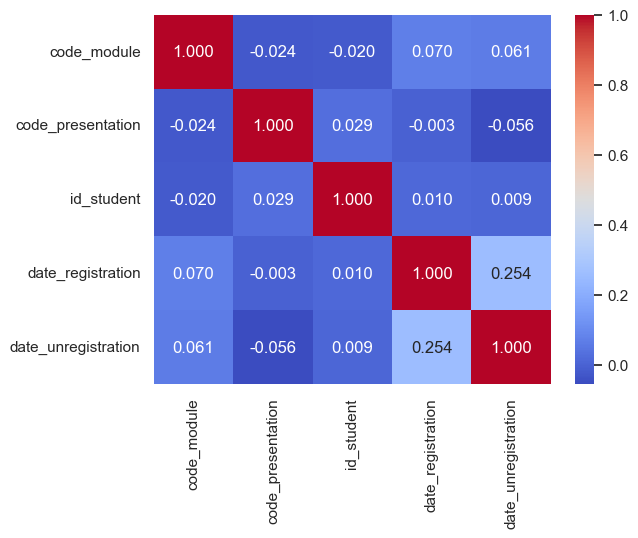

In [58]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = student_registration.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**PREPROCESSING**

Poin penting preprocessing data :

-> Terdapat missing value pada fitur data_registration sebanyak 45 baris

-> Terdapat missing value pada fitur data_unregistration sebanyak 22521 data 

Untuk mengatasi missing value pada kedua fitur tersebut adalah dengan mengganti null value dengan nilai 0

In [59]:
# Mengganti null value pada fitur date_registration dengan nilai rata-rata fitur, yaitu -69
student_registration['date_registration'] = student_registration['date_registration'].fillna(-69)

In [60]:
# Mengganti null value pada fitur date_registration dengan nilai 0
student_registration['date_unregistration'].fillna(0, inplace=True)

In [61]:
print(student_registration.isnull().sum())

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64


In [62]:
student_registration.shape

(32593, 5)

**Missing value taratasi dan jumlah data tidak berkurang**

# STUDENT VLE

**Menampilkan data head dan data tail pada dataset student vle**

In [63]:
student_vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


**Menampilkan jumlah data dan jumlah fitur student vle**

In [64]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
student_vle.shape

JUMLAH DATA DAN JUMLAH FITUR :


(10655280, 6)


-> Jumlah data sebesar 10655280 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset student vle**

In [65]:
print("INFO DATA :")
student_vle.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [66]:
# Melakukan cek value null atau data kosong
print(student_vle.isnull().sum())

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [67]:
# Melakukan cek jumlah data yang duplikat
duplicate = student_vle.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 787170


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Tidak terdapat missing value

-> Terdapat duplikasi data sebanyak 787170, hal ini terjadi karena adanya banyak data sum_click yang dimiliki 1 mahasiswa dan hasil dari sum_click tersebut kebanyakan sama sehingga terdeteksi duplikat

**Menampilkan statistik data student vle**

In [68]:
print("STATISTIK DATA :")
student_vle.describe()

STATISTIK DATA :


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


-> Informasi statistik data pada fitur yang bertipe numerik

**Data Correlation**

In [69]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_student_vle =student_vle

for column in temp_student_vle.columns:
    if temp_student_vle[column].dtype == 'object':
        temp_student_vle[column] = le.fit_transform(temp_student_vle[column])
temp_student_vle.dtypes

code_module          int32
code_presentation    int32
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtype: object

<Axes: >

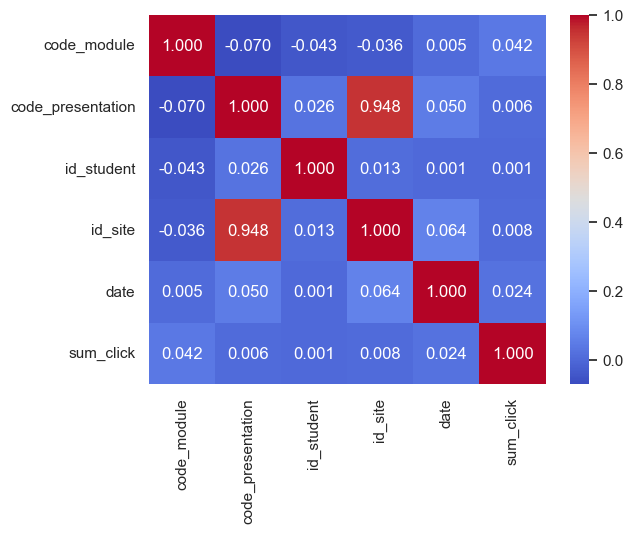

In [70]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = student_vle.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

# VLE

**Menampilkan data head dan data tail pada dataset vle**

In [71]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


**Menampilkan jumlah data dan jumlah fitur vle**

In [72]:
print("JUMLAH DATA DAN JUMLAH FITUR :")
vle.shape

JUMLAH DATA DAN JUMLAH FITUR :


(6364, 6)


-> Jumlah data sebesar 6364 baris

-> Jumlah fitur adalah 6 buah

**Menampilkan dataset info dari dataset vle**

In [73]:
print("INFO DATA :")
vle.info()

INFO DATA :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [74]:
# Melakukan cek jumlah data yang duplikat
duplicate = vle.duplicated()
total_duplicate = duplicate.sum()
print(f"Jumlah duplikat: {total_duplicate}")

Jumlah duplikat: 0


-> Terdapat 3 tipe data object dan 3 tipe data numerik

-> Terdapat missing value pada fitur week_from sebanyak 5243 baris

-> Terdapat missing value pada fitur week_to sebanyak 5243 baris

-> Tidak terdapat duplikasi data

**Menampilkan statistik data vle**

In [75]:
print("STATISTIK DATA :")
vle.describe()

STATISTIK DATA :


,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


-> Informasi statistik data pada fitur yang bertipe numerik

**Data Correlation**

In [76]:
# Melakukan label encoding atau merubah objek menjadi numerik agar 
# bisa dilakukan pencarian korelasi data 

le = LabelEncoder()

temp_vle =vle

for column in temp_vle.columns:
    if temp_vle[column].dtype == 'object':
        temp_vle[column] = le.fit_transform(temp_vle[column])
temp_vle.dtypes

id_site                int64
code_module            int32
code_presentation      int32
activity_type          int32
week_from            float64
week_to              float64
dtype: object

<Axes: >

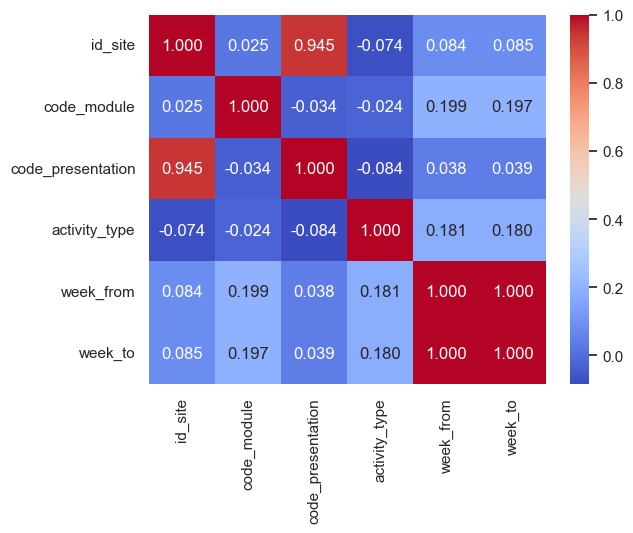

In [77]:
# Mencari korelasi data antar fitur
sns.set_theme(style="white")
corr = vle.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True, fmt='.3f')

**PREPROCESSING**

Poin penting preprocessing data :

-> Terdapat missing value pada fitur week_from sebanyak 5243 baris

-> Terdapat missing value pada fitur week_to sebanyak 5243 baris

Karena fitur week_from dan fitur week_to kemungkinan besar tidak berpengaruh dalam hubungan data maka saya memutuskan untuk melakukan drop kedua fitur tersebut

In [78]:
# Menghapus fitur week_to dan week_from
vle = vle.drop(columns=['week_from'], axis=1)
vle = vle.drop(columns=['week_to'], axis=1)

In [79]:
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,0,1,16
1,546712,0,1,9
2,546998,0,1,16
3,546888,0,1,19
4,547035,0,1,16


In [80]:
vle.shape

(6364, 4)